✅ Accuracy: 100.00%


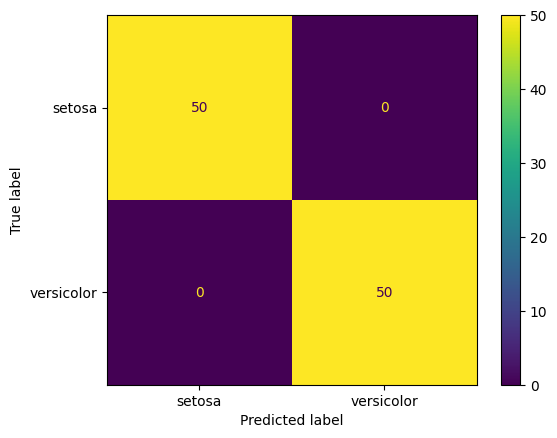

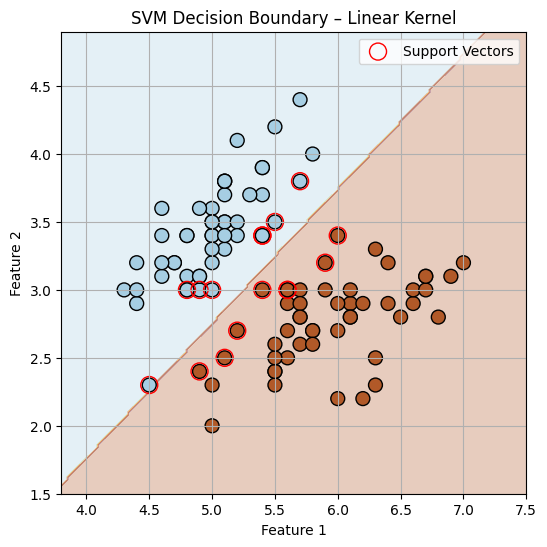

In [1]:
# 📌 Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# -----------------------------
# 1️⃣ Load Dataset (Iris 2 classes)
# -----------------------------
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using first two features for visualization
y = iris.target

# Select only 2 classes (Setosa vs Versicolor)
mask = y < 2
X = X[mask]
y = y[mask]

# -----------------------------
# 2️⃣ Train SVM Classifier
# -----------------------------
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# -----------------------------
# 3️⃣ Predictions & Accuracy
# -----------------------------
y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"✅ Accuracy: {accuracy*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names[:2])
disp.plot()
plt.show()

# -----------------------------
# 4️⃣ Decision Boundary Visualization
# -----------------------------
# Create a mesh grid
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and support vectors
plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=100, cmap=plt.cm.Paired)
plt.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1],
            facecolors='none', edgecolors='r', s=150, label='Support Vectors')
plt.title("SVM Decision Boundary – Linear Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

✅ RBF Kernel Accuracy: 100.00%


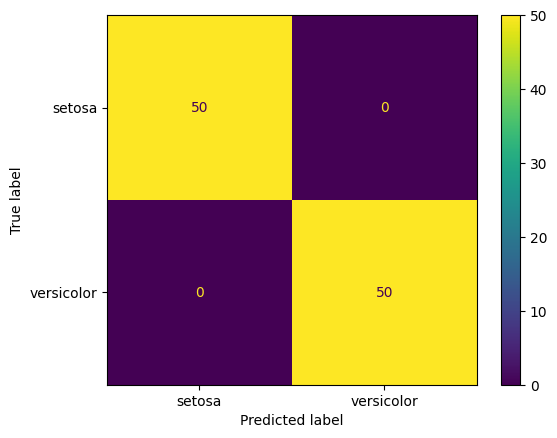

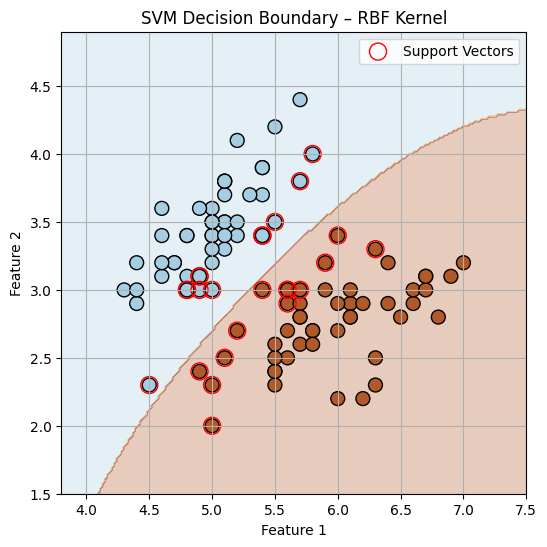

In [2]:
# -----------------------------
# 1️⃣ Train SVM Classifier with RBF Kernel
# -----------------------------
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X, y)

# -----------------------------
# 2️⃣ Predictions & Accuracy
# -----------------------------
y_pred_rbf = svm_rbf.predict(X)
accuracy_rbf = accuracy_score(y, y_pred_rbf)
print(f"✅ RBF Kernel Accuracy: {accuracy_rbf*100:.2f}%")

# Confusion Matrix
cm_rbf = confusion_matrix(y, y_pred_rbf)
disp_rbf = ConfusionMatrixDisplay(cm_rbf, display_labels=iris.target_names[:2])
disp_rbf.plot()
plt.show()

# -----------------------------
# 3️⃣ Decision Boundary Visualization
# -----------------------------
Z_rbf = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z_rbf, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=100, cmap=plt.cm.Paired)
plt.scatter(svm_rbf.support_vectors_[:,0], svm_rbf.support_vectors_[:,1],
            facecolors='none', edgecolors='r', s=150, label='Support Vectors')
plt.title("SVM Decision Boundary – RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


<h2>SVM : Summary & Insights

<h3>SVM vs Perceptron:

1. Perceptron: Finds a linear separator but doesn’t maximize the margin.

2. SVM: Finds the hyperplane with maximum margin, improving generalization.

<h3>Observations:

1. Support vectors are highlighted in red (critical points that define the boundary).

2. Linear SVM can perfectly separate the two classes here.

<h3>Key Takeaways:

1. SVM is a powerful linear classifier and also handles non-linear problems with kernels.

2. Decision boundary visualization helps in understanding model behavior.